## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
import math
import seaborn as sns
from statistics import mean
from math import sqrt

## Loading dataset

In [2]:
data = pd.read_csv("letter-recognition.csv",header=0)# header 0 means the first row is name of the coloumn 
 
# View sample data
data.head(10) 

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


/home/admin1/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='letter', ylabel='count'>

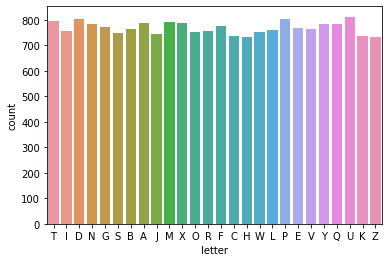

In [3]:
# Plot distribution
sns.countplot(data['letter'])

## Splitting dataset

In [4]:
x = data.iloc[:, 1:]
y = data['letter'].tolist()
print(x)

# Select 4000 rows data as a testing dataset
x_test = x.iloc[0:4000, :].values.astype('float32') # all pixel values 
y_test = y[0:4000] # Select label for testing data
x_train = x.iloc[4000:, :].values.astype('float32') # all pixel values 
y_train = y[4000:]

# # Share test and train data
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

       xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0          2      8       3       5       1      8     13      0       6   
1          5     12       3       7       2     10      5      5       4   
2          4     11       6       8       6     10      6      2       6   
3          7     11       6       6       3      5      9      4       6   
4          2      1       3       1       1      8      6      6       6   
...      ...    ...     ...     ...     ...    ...    ...    ...     ...   
19995      2      2       3       3       2      7      7      7       6   
19996      7     10       8       8       4      4      8      6       9   
19997      6      9       6       7       5      6     11      3       7   
19998      2      3       4       2       1      8      7      2       6   
19999      4      9       6       6       2      9      5      3       1   

       xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0           6      10  

## Normalization

In [5]:
# Proceed to normalize the features because the pixel intensities are currently between the range of 0 and 255
print((min(x_train[2]), max(x_train[2])))

# Normalizing the data
x_train = x_train/255.0
x_test = x_test/255.0

# Printing the shape of the Datasets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(1.0, 12.0)
x_train shape: (16000, 16)
16000 train samples
4000 test samples


## Training - SVM

In [6]:
model_clf = svm.SVC(C=5, kernel ='poly')

# Train the svm algorithm
model_clf.fit(x_train, y_train)

SVC(C=5, kernel='poly')

## Testing model on test data

In [7]:
# Apply the trained svm to make prediction of test data
y_pred = model_clf.predict(x_test)

## MULTI-CLASS CONFUSION MATRIX FOR EACH CLASS

In [8]:
# Actual and predicted classes
lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label A-Z
lst_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' ]


# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)
# Temp store results
store_sens = [];
store_spec = [];
store_acc = [];
store_bal_acc = [];
store_prec = [];
store_fscore = [];
store_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]
    
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    x = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(x), 3)
    store_sens.append(sensitivity);
    store_spec.append(specificity);
    store_acc.append(accuracy);
    store_bal_acc.append(balanced_accuracy);
    store_prec.append(precision);
    store_fscore.append(f1Score);
    store_mcc.append(MCC);
    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Sensitivity: {0}".format(sensitivity));
    print("Specificity: {0}".format(specificity));
    print("Accuracy: {0}".format(accuracy));
    print("Balanced Accuracy: {0}".format(balanced_accuracy));
    
    print("Precision: {0}".format(precision));
    print("F1-Score: {0}".format(f1Score));
    print("MCC: {0}\n".format(MCC));

Print Class: 0
TP=160, FP=3, TN=3837, FN=0
Sensitivity: 1.0
Specificity: 0.999
Accuracy: 0.999
Balanced Accuracy: 1.0
Precision: 0.982
F1-Score: 0.991
MCC: 0.99

Print Class: 1
TP=150, FP=10, TN=3830, FN=10
Sensitivity: 0.938
Specificity: 0.997
Accuracy: 0.995
Balanced Accuracy: 0.968
Precision: 0.938
F1-Score: 0.938
MCC: 0.935

Print Class: 2
TP=157, FP=6, TN=3827, FN=10
Sensitivity: 0.94
Specificity: 0.998
Accuracy: 0.996
Balanced Accuracy: 0.969
Precision: 0.963
F1-Score: 0.952
MCC: 0.95

Print Class: 3
TP=161, FP=14, TN=3820, FN=5
Sensitivity: 0.97
Specificity: 0.996
Accuracy: 0.995
Balanced Accuracy: 0.983
Precision: 0.92
F1-Score: 0.944
MCC: 0.942

Print Class: 4
TP=145, FP=12, TN=3837, FN=6
Sensitivity: 0.96
Specificity: 0.997
Accuracy: 0.996
Balanced Accuracy: 0.978
Precision: 0.924
F1-Score: 0.942
MCC: 0.939

Print Class: 5
TP=141, FP=15, TN=3839, FN=5
Sensitivity: 0.966
Specificity: 0.996
Accuracy: 0.995
Balanced Accuracy: 0.981
Precision: 0.904
F1-Score: 0.934
MCC: 0.932

Pr